时间序列去趋势化和傅里叶变换

pip install pymatgen

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
 
# N = 10
# ns = np.arange(N)
 
# fig, axes = plt.subplots(1, N//2+1, figsize=(18,8), sharex=True, sharey=True)
 
# for k in range(0, N//2+1):
#      eiks = np.exp(-2*1J*np.pi*ns/N*k)
#      pretty_ax(axes[k])
#      plot_sum_vector(eiks, axes[k])
#      axes[k].set_title(f'k={k}')
#      axes[k].set_aspect('equal')
# fig.suptitle(f'Complex plot of the $e^{{-2i\pi kn/N}}$ families')

去趋势

Text(0.5, 1.0, 'Module of Fourier-transform')

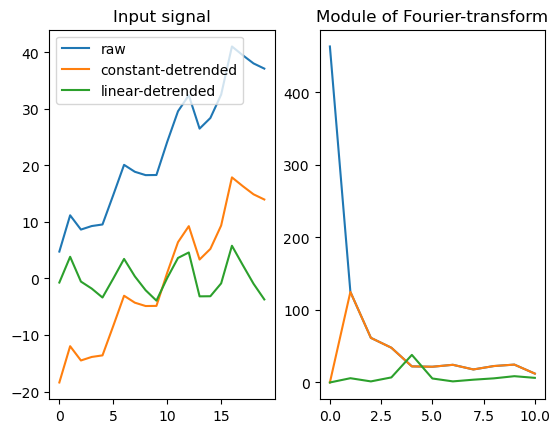

In [2]:
import numpy as np
from scipy.signal import detrend
import matplotlib.pyplot as plt
 
N = 20
 # create a sample signal, with linear, offset, noise and sinus parts
ys = np.arange(N) * 2 + 4 + np.random.randn(N) + 4*np.sin(2*np.pi*np.arange(N)/5)
 # constant and linear detrend
ys_c = detrend(ys, type='constant')
ys_l = detrend(ys, type='linear')
 
fig, axes = plt.subplots(1, 2)
 
ax = axes[0]
ax.plot(ys, label='raw')
ax.plot(ys_c, label='constant-detrended')
ax.plot(ys_l, label='linear-detrended')
ax.legend()
ax.set_title('Input signal')
 
ax = axes[1]
 # we use rfft since our input signals are real
ax.plot(np.abs(np.fft.rfft(ys)))
ax.plot(np.abs(np.fft.rfft(ys_c)))
ax.plot(np.abs(np.fft.rfft(ys_l)))
ax.set_title('Module of Fourier-transform')

傅里叶去噪
![alt text](image-2.png)

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as scifft
 
#噪音处理可以适用
 
plt.close('all')
 
fig1, ax1 = plt.subplots(3, 1, figsize=(9, 7))
 
# 每间隔0.001取一个对象
dt = 0.001
 
#制作时间序列
t = np.arange(0.0, 1.0, dt )
 
#随便定义两个周波数(单位是Hz=1/s)
f1 = 20.0
f2 = 110.0
 
#用上面两个周波数制作信号f(t)
#这个信号是两个周波数合成的信号
f = np.sin(2.0 * np.pi *f1 * t) +np.sin(2.0 * np.pi *f2 * t)
 
#纯净的信号定义成f_clean，代入到f中
f_clean = f
 
ax1[0].plot(t, f_clean, color='red') #f_clean(t)为纵坐标作图
ax1[0].set_xlim(0, 1)
ax1[0].set_ylim(-10, 10)
ax1[0].set_xlabel('time (sec)') 
ax1[0].set_ylabel('f_clean(t)') 
 
#设置乱数加入到f中（制作噪音）
f = f + 2.5 *np.random.randn(len(t))
ax1[1].set_xlim(0, 1)
ax1[1].plot(t, f, color='blue')
ax1[1].set_ylim(-10, 10) 
ax1[1].set_xlabel('time (sec)')
ax1[1].set_ylabel('f_noisy(t)')
plt.show()
 
fig2, ax2 = plt.subplots(4, 1, figsize=(9, 7))
 
#时间的数目代入到num_data
num_data =len(t)
 
#freq把num_data作为横轴。shift是从小到大排序。（逆傅里叶变换的时候也要进行一次shift排序。）
freq = scifft.fftfreq(num_data, d=dt)  
#print("freq(before shit)=",freq)
freq = scifft.fftshift(freq)
#print("freq(after shit)=",freq)
 
 
 
 
"""
下面是信号f(t)的傅里叶变换f_hat(f)。f_hat是周波数f的函数。要注意：f_fat求的结果是複素数（实部+虚部）。
"""
f_hat = scifft.fft(f,n=num_data)
f_hat = scifft.fftshift(f_hat) 
 
"""
傅里叶与f_hat绝对值平方相关的spect(複素数f_hat的絶対値的2乗 除以分割的数目). np.conj是複素共役。f_hat *np.conj(f_hat)是f_hat的绝对值
"""
f_spect = f_hat * np.conj(f_hat)/num_data
#傅里叶纵坐标分为三个：实部，虚部和复数的二乘相关的函数
# f_hat(f)作图（实部real）
ax2[0].plot(freq, np.real(f_hat), color='blue')
ax2[0].set_xlim(0, 500)
ax2[0].set_ylim(-700, 700) 
ax2[0].set_xlabel('freq (Hz)') 
ax2[0].set_ylabel('Re[f_hat]') 
 
# f_hat(f)作图（虚部imag）
ax2[1].plot(freq, np.imag(f_hat), color='blue')
ax2[1].set_xlim(0, 500) 
ax2[1].set_ylim(-700, 700) 
ax2[1].set_xlabel('freq (Hz)') 
ax2[1].set_ylabel('Im[f_hat]')
 
# f_hat的spect作图
ax2[2].plot(freq,f_spect, color='blue',label="before filtering") #傅里叶变换：可以看出有噪音
ax2[2].set_xlim(0, 500) 
ax2[2].set_ylim(0, 500) 
ax2[2].set_xlabel('freq (Hz)') 
ax2[2].set_ylabel('f_spect') 
ax2[2].legend()
 
"""
傅里叶f左右对称，虽然会出现负周期但是可以只输出正的部分。
"""
 
#傅里叶去除噪音部分
#配列indices是超过60的True留下。小于60的全部当做Flase噪音去除。
indices = f_spect>60 #大于60的部分留下
#print("indices=", indices)
 
#f_hat或者f_spect乘以indices（※True（1倍），False(0倍)）可以只使True的留下。其它部分都变成0。
f_spect_filtered = f_spect * indices
f_hat_filtered = f_hat * indices
 
ax2[3].plot(freq,f_spect_filtered, color='red',label="after filtering")
ax2[3].set_xlim(0, 500)
ax2[3].set_ylim(0, 500) 
ax2[3].set_xlabel('freq (Hz)') 
ax2[3].set_ylabel('f_spect(freq)') 
ax2[3].legend()
 
#逆傅里叶变换准备：要用fftshift
f_hat_filtered = scifft.fftshift(f_hat_filtered) #python程序变换的数值都是f_hat的，f_spect是看整体大图应该去除哪部分的。
f_filterd = scifft.ifft(f_hat_filtered,n=num_data)#ifft是逆傅里叶变换
 
ax1[2].set_xlim(0, 1) 
ax1[2].set_ylim(-10, 10) 
ax1[2].plot(t, np.real(f_filterd), color='blue') #只画出实数部
ax1[2].set_xlabel('time (sec)') 
ax1[2].set_ylabel('f_filtered(t)') 
 
plt.show()
plt.tight_layout()

In [68]:
import scipy.fft as scifft
import pandas as pd
from scipy.signal import detrend

In [69]:
#傅里叶变换只能接受np.array
google_stock= pd.read_csv("data/Google_Stock_Price_Train.csv")
time = google_stock["Date"][:300]
value = np.array(google_stock["Open"][:300])
denoised_google_stock_price = scifft.fft(value,n=300)
detrend=detrend(value, type='linear')

d:\anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


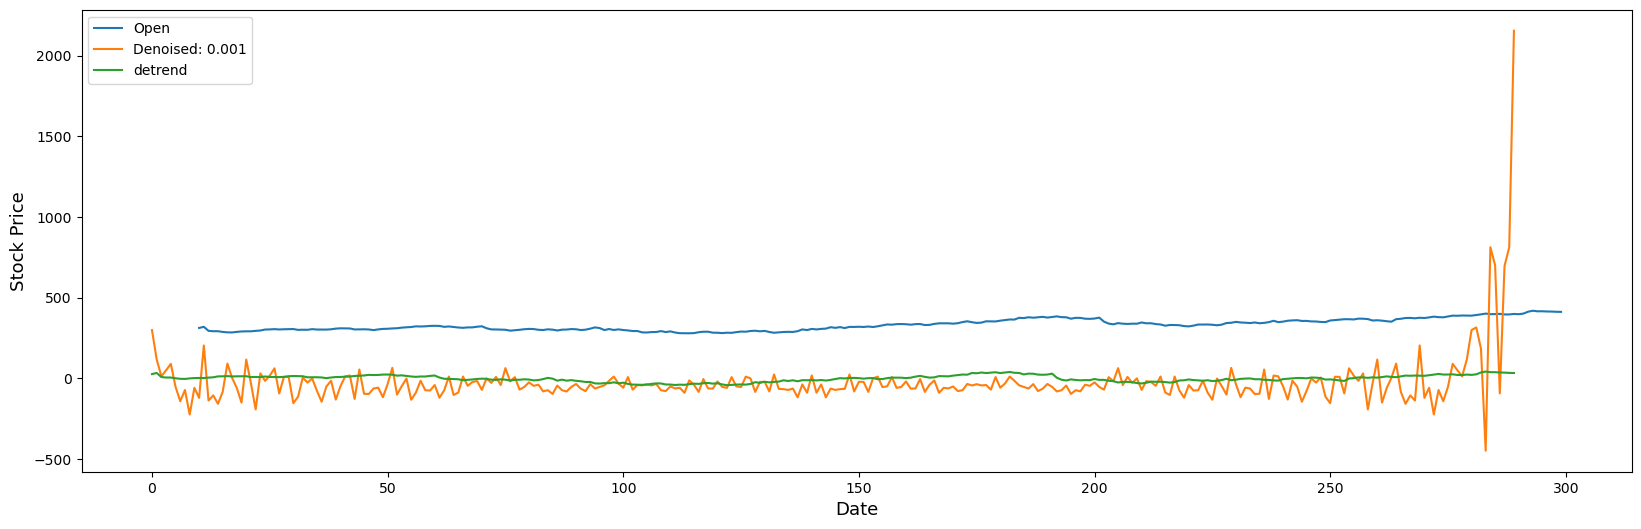

In [70]:
plt.figure(figsize=(20,6))
plt.plot(google_stock['Open'][10:300])
plt.plot(denoised_google_stock_price[10:])
plt.plot(detrend[10:])
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.legend(['Open','Denoised: 0.001',"detrend"])
plt.show()
